In [3]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score


from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# import requests
# from io import StringIO
# url = ""
# headers = "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
# req requests.get(url, headers=headers)
# data = StringIO(req.text)
# pd.read_csv(data)

In [6]:
df = pd.read_csv('/content/usecase_2_.csv',on_bad_lines='skip', encoding='latin-1',quoting =3)

In [7]:
df.shape

(141683, 26)

In [8]:
df.sample(1)

,,,,,,,,,,,,,,,,,,Unnamed: 0,NCT Number,Study Title,Study URL,Acronym,Study Status,Brief Summary,Study Results,Conditions,Interventions,...,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Other IDs,Locations,Study Documents,Time taken for Enrollment
* I have felt little interest or pleasure in doing things.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(141683, 26)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 141683 entries, ('0', 'NCT04841499', '"Effects of a Seven-day BASISâ\x84¢ Supplementation on Menopausal Syndromes and Measurements of the Urinary Vitamin B3 and Estradiol Levels in Pre-', ' Peri- and Post-menopause"', 'https://clinicaltrials.gov/study/NCT04841499', nan, 'COMPLETED', '"The purpose of this study is to determine whether a short supplementation (7days) with BASISâ\x84¢ increases the natural production of estradiol', ' measured in urinary waste. The overall objective is to determine whether through increased estradiol levels', ' the undesirable menopausal effects', ' assessed via questionnaires', ' are mitigated by a short-term supplementation with BASISâ\x84¢"', 'NO', 'Menopause', 'DRUG: BASISâ\x84¢ (Crystalline Nicotinamide Riboside 250mg and Pterostilbene 50mg)', '"Production of Estradiol', ' To determine whether a short supplementation with BASISâ\x84¢ impacts the natural production of estradiol', ' measured in urinary w

In [11]:
df= df.drop(['Unnamed: 0','NCT Number','Acronym','Study URL','Study Title','Brief Summary','Secondary Outcome Measures','Primary Outcome Measures','Other Outcome Measures','Other IDs','Study Documents'] , axis=1)

In [12]:
df.shape

(141683, 15)

In [13]:
df.isnull().sum()

,0
Study Status,108987
Study Results,110272
Conditions,111008
Interventions,111685
Sponsor,114697
Collaborators,115801
Sex,116726
Age,118171
Phases,119670
Enrollment,121144


##Remove more than 10 missing value including rows

In [14]:
df_cleaned = df[df.isnull().sum(axis=1) <10]

In [15]:
df_cleaned.shape

(28015, 15)

In [16]:
df_cleaned.isnull().sum()

,0
Study Status,4199
Study Results,3945
Conditions,3804
Interventions,3566
Sponsor,2428
Collaborators,3258
Sex,3267
Age,4557
Phases,6020
Enrollment,7476


In [17]:

df_cleaned['Adress'] = df_cleaned['Locations'].str.split(',').str[-1].str.strip()

# df_cleaned['Adress'] = df_cleaned['Locations'].str.split(r'|', expand=True).apply(lambda x: x.str.split(',').str[-1].str.strip(), axis=1)

<ipython-input-17-75d0de7c6c50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Adress'] = df_cleaned['Locations'].str.split(',').str[-1].str.strip()


In [18]:
df_cleaned['Adress'].value_counts()

,count
Adress,
INTERVENTIONAL,505
"United States""",455
"""Study Protocol and Statistical Analysis Plan",178
OTHER,173
"Turkey""",129
...,...
Increase in the differentiation between up- and down-regulation of the fNIRS signal from session 1 to session 8 (for feedback,1
"""Auckland Clinical Studies Ltd",1
0446-18-EP,1


In [19]:
# df_cleaned = df_cleaned[df_cleaned['Adress'].notna() & (df_cleaned['Adress'] != '')]

# # Count the frequency of each name in the column
# name_counts = df_cleaned['Adress'].value_counts()

# # Replace names that appear only once with 'Single_Name'
# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Single_Name' if name_counts[x] == 1 else x)

# # Recalculate name_counts to include 'Single_Name'
# name_counts = df_cleaned['Adress'].value_counts()

# # Replace names that appear twice with 'Double_Name'
# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Double_Name' if name_counts[x] == 2 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Triple_Name' if name_counts[x] == 3 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Quadruple_Name' if name_counts[x] == 4 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Quintuple_Name' if name_counts[x] == 5 else x)

# # df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Sextuple_Name' if name_counts[x] == 6 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Septuple_Name' if name_counts[x] == 7 else x)

# # df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Octuple_Name' if name_counts[x] == 8 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Nonuple_Name' if name_counts[x] == 9 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Decuple_Name' if name_counts[x] == 10 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Undecuple_Name' if name_counts[x] == 11 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Duodecuple_Name' if name_counts[x] == 12 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Tredecuple_Name' if name_counts[x] == 13 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Quattuordecuple_Name' if name_counts[x] == 14 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Quindecuple_Name' if name_counts[x] == 15 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Sexdecuple_Name' if name_counts[x] == 16 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Septuple_Name' if name_counts[x] == 17 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Octodecuple_Name' if name_counts[x] == 18 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Novemdecuple_Name' if name_counts[x] == 19 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Dodecuple_Name' if name_counts[x] == 20 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Undodecuple_Name' if name_counts[x] == 21 else x)

# df_cleaned['Adress'] = df_cleaned['Adress'].apply(lambda x: 'Dodeca_Name' if name_counts[x] == 22 else x)

In [20]:
df_cleaned['Adress'].value_counts()

,count
Adress,
INTERVENTIONAL,505
"United States""",455
"""Study Protocol and Statistical Analysis Plan",178
OTHER,173
"Turkey""",129
...,...
Increase in the differentiation between up- and down-regulation of the fNIRS signal from session 1 to session 8 (for feedback,1
"""Auckland Clinical Studies Ltd",1
0446-18-EP,1


In [21]:
df_cleaned.Adress.unique()

array(['United States"', nan, '19', ..., 'Gyeonggi', 'COPD_PBMT',
       '01246000'], dtype=object)

In [22]:
df_cleaned['Adress'] = df_cleaned['Adress'].fillna('0')

<ipython-input-22-eef511e9b11a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Adress'] = df_cleaned['Adress'].fillna('0')


In [23]:
df_cleaned.isnull().sum()

,0
Study Status,4199
Study Results,3945
Conditions,3804
Interventions,3566
Sponsor,2428
Collaborators,3258
Sex,3267
Age,4557
Phases,6020
Enrollment,7476


In [24]:
df['Time taken for Enrollment'].dtype

dtype('O')

In [25]:
(df['Time taken for Enrollment'].value_counts())

,count
Time taken for Enrollment,
"United States""",393
"""Study Protocol and Statistical Analysis Plan",111
"Turkey""",102
3,82
"China""",79
...,...
"""University of Michigan School of Dentistry",1
2019.28633,1
60615,1


In [26]:
(df['Time taken for Enrollment'].value_counts())


,count
Time taken for Enrollment,
"United States""",393
"""Study Protocol and Statistical Analysis Plan",111
"Turkey""",102
3,82
"China""",79
...,...
"""University of Michigan School of Dentistry",1
2019.28633,1
60615,1


In [27]:
df_cleaned.sample(1)

,,,,,,,,,,,,,,,,,,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Locations,Time taken for Enrollment,Adress
20006,NCT02932332,High-Flow Oxygen for Dyspnea in Hospitalized Cancer Patients,https://clinicaltrials.gov/study/NCT02932332,NaN,COMPLETED,"""The goal of this clinical research study is to compare high-flow oxygen",low-flow oxygen,high-flow air,"and low-flow air in helping to decrease shortness of breath in cancer patients. Researchers also want to learn if these therapies can help to improve lung function and quality of life.""",YES,Cancer,OTHER: High-flow Oxygen|OTHER: Low-flow Oxygen|OTHER: High-flow Air|OTHER: Low-flow Air,"""Change in Dyspnea Numeric Score Between 0 and 10 Minutes",We assessed dyspnea intensity 'now' using a numeric rating scale from 0 to 10 where 0=none and 10=worst. The minimal clinically important difference was 1 point.,"0 (baseline) minutes and at 10 minutes""","""Change in Modified Borg Scale Intensity Between 0 and 10 Minutes",We assessed dyspnea intensity 'now' using a Modified Dyspnea Borg scale. This is a 0-10 point ratio scale with a higher score indicating worse dyspnea.,NaN,"""ADULT","OLDER_ADULT""",PHASE2,"""Allocation: RANDOMIZED|Intervention Model: CR...","INVESTIGATOR)|Primary Purpose: SUPPORTIVE_CARE""",2016-0282|NCI-2017-00186,"""The University of Texas MD Anderson Cancer Ce...",Houston,Texas,77030,"United States""","""Study Protocol and Statistical Analysis Plan",77,NaN,77


In [28]:
df.sample(2)

,,,,,,,,,,,,,,,,,,Study Status,Study Results,Conditions,Interventions,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Locations,Time taken for Enrollment
The Montreal Cognitive Assessment (MoCA) is a rapid assessment of cognition. The MoCA consists of 9 questions with the following subcategories: visuospatial/executive,naming,memory,language,abstraction,delayed recall and orientation. The MoCA has been used extensively to detect cognitive impairment in many conditions,including head trauma. Version 7.1 will be used at the Month 0 testing and Version 7.2 will be used at the Month 6 testing. Scores range from 0 to 30,higher score being a better outcome.,6 months|Global Fatigue Score as Measured by Brief Fatigue Inventory (BFI) at baseline,The Brief Fatigue Inventory is a 9 item questionnaire that assesses perceptual fatigue as well as fatigue interferences (e.g. interference with enjoyment of life),"with """"0"""" being no fatigue and """"10"""" being as bad as you can imagine. The Global Fatigue score is calculated by averaging the answers of all the questions. Brief Fatigue Inventory is measured in mTBI and PASC subjects at baseline.",baseline|Global Fatigue Score as Measured by Brief Fatigue Inventory (BFI) at 6 months,The Brief Fatigue Inventory is a 9 item questionnaire that assesses perceptual fatigue as well as fatigue interferences (e.g. interference with enjoyment of life),"with """"0"""" being no fatigue and """"10"""" being as bad as you can imagine. The Global Fatigue score is calculated by averaging the answers of all the questions. Brief Fatigue Inventory is measured in mTBI and PASC subjects after 6 months of growth hormone treatment.",6 months|Global Fatigue Score as Measured by Brief Fatigue Inventory (BFI) at 9 months,The Brief Fatigue Inventory is a 9 item questionnaire that assesses perceptual fatigue as well as fatigue interferences (e.g. interference with enjoyment of life),"with """"0"""" being no fatigue and """"10"""" being as bad as you can imagine. The Global Fatigue score is calculated by averaging the answers of all the questions. Brief Fatigue Inventory is measured in PASC subjects after 9 months of growth hormone treatment.",9 months|Global Fatigue Score as Measured by Brief Fatigue Inventory (BFI) at 12 months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
* Health Assessment Questionnaire - Disability Index (HAQ-DI),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Count null value

In [29]:
df.shape


(141683, 15)

In [30]:
print(df.isnull().sum())

Study Status                 108987
Study Results                110272
Conditions                   111008
Interventions                111685
Sponsor                      114697
Collaborators                115801
Sex                          116726
Age                          118171
Phases                       119670
Enrollment                   121144
Funder Type                  122855
Study Type                   124631
Study Design                 126064
Locations                    129491
Time taken for Enrollment    132685
dtype: int64


In [31]:
print(df.isnull().sum().sum())

1783887


#For Age

In [32]:
df_cleaned['Age'].value_counts()

,count
Age,
INTERVENTIONAL,1391
OTHER,1017
"OLDER_ADULT""",655
ALL,607
"United States""",541
...,...
30144,1
"""Berner Rehazentrum AG",1
"""Mohamed H Bakri",1


In [33]:
df_cleaned = df_cleaned[df_cleaned['Age'].notna() & (df_cleaned['Age'] != '')]

name_counts = df_cleaned['Age'].value_counts()

df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: 0 if name_counts[x] == 1 else x)

name_counts = df_cleaned['Age'].value_counts()

df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: 1 if name_counts[x] == 2 else x)

df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: 2 if name_counts[x] == 3 else x)

df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: 3 if name_counts[x] == 4 else x)

df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: 4 if name_counts[x] == 5 else x)

df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: 5 if name_counts[x] == 6 else x)

<ipython-input-33-64077a166889>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: 0 if name_counts[x] == 1 else x)


KeyError: 1

In [ ]:
df_cleaned['Age'].value_counts()

In [ ]:
df_cleaned['Age'] = df_cleaned['Age'].fillna('100')


In [ ]:
# df = df.drop(['Acronym','Other Outcome Measures','Collaborators' , 'Phases' , 'Study Documents'] , axis=)

In [ ]:
df.tail()

In [ ]:
df_cleaned.info()

#Loop to comvert to int


In [ ]:
df_cleaned.Conditions.value_counts()

In [ ]:
df_cleaned = df_cleaned[df_cleaned['Conditions'].notna() & (df_cleaned['Conditions'] != '')]

# Fill missing values with '0' (if there are any left)
df_cleaned['Conditions'] = df_cleaned['Conditions'].fillna('0')

# Convert column to string explicitly to ensure consistent handling of values
df_cleaned['Conditions'] = df_cleaned['Conditions'].astype(str)

# Dynamically update values based on their frequency
name_counts = df_cleaned['Conditions'].value_counts()
for i in range(1, 21):  # Loop from 1 to 20
    df_cleaned['Conditions'] = df_cleaned['Conditions'].apply(lambda x: i if name_counts[x] == i else x)
    name_counts = df_cleaned['Conditions'].value_counts()

# Convert 'Age' column to integer type
# df_cleaned['Conditions'] = df_cleaned['Conditions'].astype(int)

In [34]:
df_cleaned['Conditions'].value_counts()

,count
Conditions,
ALL,1358
OTHER,1212
"OLDER_ADULT""",1123
INTERVENTIONAL,1096
"""ADULT",1015
...,...
24 hours after the procedure (T5)|Range Of Motion,1
"""Sinus Center - Medical Univesity of South Carolina",1
90-120 min|Detection rate of qualitative [18F]FES PET/CT evaluation for distant metastasis,1


In [35]:
df_

NameError: name 'df_clear' is not defined

In [ ]:
name_counts = df_cleaned['Age'].value_counts()

df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: 0 if name_counts[x] == 1 else x)


In [ ]:
df_cleaned['Age'].value_counts()

#========================= =========================================

#=====================  USING NEW DATASET ===========================

In [372]:
df_clear = df[df.isnull().sum(axis=1) <10]

In [373]:
df_clear.shape

(28015, 15)

In [374]:
df_clear.isnull().sum()

,0
Study Status,4199
Study Results,3945
Conditions,3804
Interventions,3566
Sponsor,2428
Collaborators,3258
Sex,3267
Age,4557
Phases,6020
Enrollment,7476


##for Study style

In [375]:
df_clear['Study Status'].value_counts()

,count
Study Status,
ALL,1559
"OLDER_ADULT""",1313
"""ADULT",967
OTHER,895
INTERVENTIONAL,594
...,...
1 year|QoL: quality of life: Percentage of partecipants changing their smoking habits,1
Functionality of gastric drainage channel which will be inserted through the appropriate channel of the SGAD.,1
blinded sinus surgeon based on the centralized video-endoscopy review. FSO diameter estimated endoscopically by probing with a 3-mm olive-shaped frontal sinus suction tip and reported in mm.,1


In [376]:
import pandas as pd

# Assuming 'df_clear' is your DataFrame
# Replace NaN and empty values
df_clear = df_clear[df_clear['Study Status'].notna() & (df_clear['Study Status'] != '')]
df_clear['Study Status'] = df_clear['Study Status'].fillna('0')

# Convert column to string to standardize
df_clear['Study Status'] = df_clear['Study Status'].astype(str)

# Convert strings to numeric where possible (ignore errors)
df_clear['Study Status'] = pd.to_numeric(df_clear['Study Status'], errors='coerce')

# Dynamically update values based on their frequency
name_counts = df_clear['Study Status'].value_counts()

# Loop from 1 to 20 and skip NaN values explicitly
for i in range(1, 21):
    df_clear['Study Status'] = df_clear['Study Status'].apply(
        lambda x: i if pd.notna(x) and name_counts.get(x, 0) == i else x
    )
    name_counts = df_clear['Study Status'].value_counts()

# Convert back to integer (after handling non-convertible values)
df_clear['Study Status'] = df_clear['Study Status'].fillna(0).astype(int)

# Display the cleaned DataFrame
print(df_clear)


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Study Status  \
2                                                  NCT03727620   

In [377]:
df_clear['Study Status'].value_counts()

,count
Study Status,
0,21921
1,234
2,115
6,110
3,95
4,91
11,89
30,78
12,76


#For Study Result

In [378]:
df_clear['Study Results'].value_counts()

,count
Study Results,
INTERVENTIONAL,1614
ALL,1485
"OLDER_ADULT""",1180
OTHER,317
"""ADULT",309
...,...
Day 0|Median Length of Hospital Stay,1
nose,1
Every 3-6 months,1


In [379]:


# Assuming 'df_clear' is your DataFrame
# Replace NaN and empty values
df_clear = df_clear[df_clear['Study Results'].notna() & (df_clear['Study Results'] != '')]
df_clear['Study Results'] = df_clear['Study Results'].fillna('0')

# Convert column to string to standardize
df_clear['Study Results'] = df_clear['Study Results'].astype(str)

# Convert strings to numeric where possible (ignore errors)
df_clear['Study Results'] = pd.to_numeric(df_clear['Study Results'], errors='coerce')

# Dynamically update values based on their frequency
name_counts = df_clear['Study Results'].value_counts()

# Loop from 1 to 20 and skip NaN values explicitly
for i in range(1, 21):
    df_clear['Study Results'] = df_clear['Study Results'].apply(
        lambda x: i if pd.notna(x) and name_counts.get(x, 0) == i else x
    )
    name_counts = df_clear['Study Results'].value_counts()

# Convert back to integer (after handling non-convertible values)
df_clear['Study Results'] = df_clear['Study Results'].fillna(0).astype(int)

# Display the cleaned DataFrame
print(df_clear)


<ipython-input-379-7301b0183a68>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Study Results'] = df_clear['Study Results'].fillna('0')
<ipython-input-379-7301b0183a68>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Study Results'] = df_clear['Study Results'].astype(str)
<ipython-input-379-7301b0183a68>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Study Status  \
2                                                  NCT03727620   

In [380]:
df_clear['Study Results'].value_counts()

,count
Study Results,
0,18574
1,299
20,123
2,120
4,103
11,83
3,80
30,79
6,76


#For Conditions

In [381]:
df_clear['Conditions'].value_counts()

,count
Conditions,
OTHER,1476
"""ADULT",1038
INTERVENTIONAL,558
ADULT,447
"OLDER_ADULT""",425
...,...
United States|City Doc Urgent Care center,1
Rhode Island,1
Identification of attitudes of survivors toward the physical activity program will be analyzed using descriptive statistics. Examining the data by groups will further refine understanding of the emergent themes. Discussion of the findings and suggestions for interpretation will be used to guide subsequent analyses to more fully understand the themes and patterns among the themes.,1


In [382]:
import pandas as pd

# Assuming 'df_clear' is your DataFrame
# Replace NaN and empty values
df_clear = df_clear[df_clear['Conditions'].notna() & (df_clear['Conditions'] != '')]
df_clear['Conditions'] = df_clear['Conditions'].fillna('0')

# Convert column to string to standardize
df_clear['Conditions'] = df_clear['Conditions'].astype(str)

# Convert strings to numeric where possible (ignore errors)
df_clear['Conditions'] = pd.to_numeric(df_clear['Conditions'], errors='coerce')

# Dynamically update values based on their frequency
name_counts = df_clear['Conditions'].value_counts()

# Loop from 1 to 20 and skip NaN values explicitly
for i in range(1, 21):
    df_clear['Conditions'] = df_clear['Conditions'].apply(
        lambda x: i if pd.notna(x) and name_counts.get(x, 0) == i else x
    )
    name_counts = df_clear['Conditions'].value_counts()

# Convert back to integer (after handling non-convertible values)
df_clear['Conditions'] = df_clear['Conditions'].fillna(0).astype(int)

# Display the cleaned DataFrame
print(df_clear)


<ipython-input-382-d008b1d118c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Conditions'] = df_clear['Conditions'].fillna('0')
<ipython-input-382-d008b1d118c5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Conditions'] = df_clear['Conditions'].astype(str)


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Study Status  \
2                                                  NCT03727620   

In [383]:
df_clear['Conditions'].value_counts()

,count
Conditions,
0,17020
1,270
3,62
2,59
4,54
12,51
6,42
8,42
5,31


#For Interventions

In [384]:
df_clear['Interventions'].value_counts()

,count
Interventions,
INTERVENTIONAL,1913
"OLDER_ADULT""",1081
OTHER,301
ALL,268
INDUSTRY,191
...,...
Kfar Saba,1
Up to 123 Weeks|Percentage of Participants Positive for Anti-drug Antibodies (ADAs) to Relatlimab,1
LAT8881 is measured in plasma samples taken pre-dose and at 5 minutes,1


#Skip it Interventions

In [385]:
df_clear = df_clear.drop(['Interventions'] , axis=1)

#For Sponsor

In [386]:
df_clear['Sponsor'].value_counts()

,count
Sponsor,
INTERVENTIONAL,1185
ALL,910
"""ADULT",480
"United States""",368
OTHER,262
...,...
Premier Research Group plc,1
H7S1Z5,1
Bioinformation-panc,1


In [387]:
import pandas as pd

# Assuming 'df_clear' is your DataFrame
# Replace NaN and empty values
df_clear = df_clear[df_clear['Sponsor'].notna() & (df_clear['Sponsor'] != '')]
df_clear['Sponsor'] = df_clear['Sponsor'].fillna('0')

# Convert column to string to standardize
df_clear['Sponsor'] = df_clear['Sponsor'].astype(str)

# Convert strings to numeric where possible (ignore errors)
df_clear['Sponsor'] = pd.to_numeric(df_clear['Sponsor'], errors='coerce')

# Dynamically update values based on their frequency
name_counts = df_clear['Sponsor'].value_counts()

# Loop from 1 to 20 and skip NaN values explicitly
for i in range(1, 21):
    df_clear['Sponsor'] = df_clear['Sponsor'].apply(
        lambda x: i if pd.notna(x) and name_counts.get(x, 0) == i else x
    )
    name_counts = df_clear['Sponsor'].value_counts()

# Convert back to integer (after handling non-convertible values)
df_clear['Sponsor'] = df_clear['Sponsor'].fillna(0).astype(int)

# Display the cleaned DataFrame
print(df_clear)


<ipython-input-387-7145017a0801>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Sponsor'] = df_clear['Sponsor'].fillna('0')
<ipython-input-387-7145017a0801>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Sponsor'] = df_clear['Sponsor'].astype(str)
<ipython-input-387-7145017a0801>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Study Status  \
2                                                  NCT03727620   

In [388]:
df_clear['Sponsor'].value_counts()

,count
Sponsor,
0,14686
1,738
2,259
3,118
4,106
5,91
6,85
8,57
7,42


#For  Collaborators

In [389]:
df_clear['Collaborators'].value_counts()

,count
Collaborators,
"""ADULT",630
"OLDER_ADULT""",488
"United States""",463
INTERVENTIONAL,326
OTHER,256
...,...
827284,1
Home-HIT_T1D,1
AOR14068,1


In [390]:
import pandas as pd

# Assuming 'df_clear' is your DataFrame
# Replace NaN and empty values
df_clear = df_clear[df_clear['Collaborators'].notna() & (df_clear['Collaborators'] != '')]
df_clear['Collaborators'] = df_clear['Collaborators'].fillna('0')

# Convert column to string to standardize
df_clear['Collaborators'] = df_clear['Collaborators'].astype(str)

# Convert strings to numeric where possible (ignore errors)
df_clear['Collaborators'] = pd.to_numeric(df_clear['Collaborators'], errors='coerce')

# Dynamically update values based on their frequency
name_counts = df_clear['Collaborators'].value_counts()

# Loop from 1 to 20 and skip NaN values explicitly
for i in range(1, 21):
    df_clear['Collaborators'] = df_clear['Collaborators'].apply(
        lambda x: i if pd.notna(x) and name_counts.get(x, 0) == i else x
    )
    name_counts = df_clear['Collaborators'].value_counts()

# Convert back to integer (after handling non-convertible values)
df_clear['Collaborators'] = df_clear['Collaborators'].fillna(0).astype(int)

# Display the cleaned DataFrame
print(df_clear)


<ipython-input-390-911f286253a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Collaborators'] = df_clear['Collaborators'].fillna('0')
<ipython-input-390-911f286253a0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Collaborators'] = df_clear['Collaborators'].astype(str)
<ipython-input-390-911f286253a0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Study Status  \
2                                                  NCT03727620   

In [391]:
df_clear['Collaborators'].value_counts()

,count
Collaborators,
0,12498
1,671
2,238
3,121
4,89
5,60
6,55
8,27
14,14


In [392]:
df_clear['Collaborators'].value_counts()

,count
Collaborators,
0,12498
1,671
2,238
3,121
4,89
5,60
6,55
8,27
14,14


#For Sex

In [393]:
df_clear['Sex'].value_counts()

,count
Sex,
"OLDER_ADULT""",675
INTERVENTIONAL,316
ALL,249
"United States""",211
"""ADULT",162
...,...
Day 5 of TMS,1
HPrato-4,1
33016,1


In [394]:
import pandas as pd

# Assuming 'df_clear' is your DataFrame
# Replace NaN and empty values
df_clear = df_clear[df_clear['Sex'].notna() & (df_clear['Sex'] != '')]
df_clear['Sex'] = df_clear['Sex'].fillna('0')

# Convert column to string to standardize
df_clear['Sex'] = df_clear['Sex'].astype(str)

# Convert strings to numeric where possible (ignore errors)
df_clear['Sex'] = pd.to_numeric(df_clear['Sex'], errors='coerce')

# Dynamically update values based on their frequency
name_counts = df_clear['Sex'].value_counts()

# Loop from 1 to 20 and skip NaN values explicitly
for i in range(1, 21):
    df_clear['Sex'] = df_clear['Sex'].apply(
        lambda x: i if pd.notna(x) and name_counts.get(x, 0) == i else x
    )
    name_counts = df_clear['Sex'].value_counts()

# Convert back to integer (after handling non-convertible values)
df_clear['Sex'] = df_clear['Sex'].fillna(0).astype(int)

# Display the cleaned DataFrame
print(df_clear)


<ipython-input-394-d15fa4695793>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Sex'] = df_clear['Sex'].fillna('0')
<ipython-input-394-d15fa4695793>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Sex'] = df_clear['Sex'].astype(str)
<ipython-input-394-d15fa4695793>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Study Status  \
2                                                  NCT03727620   

In [395]:
df_clear['Sex'].value_counts()

,count
Sex,
0,9840
1,722
2,279
3,138
4,101
5,75
7,63
8,57
6,48


In [396]:
df_clear['Sex'] = df_clear['Sex'].replace(55905,15)

In [397]:
df_clear['Sex'].value_counts()


,count
Sex,
0,9840
1,722
2,279
3,138
4,101
5,75
7,63
8,57
6,48


#For Age

In [398]:
df_clear['Age'].value_counts()

,count
Age,
"United States""",496
"OLDER_ADULT""",224
"""ADULT",184
INTERVENTIONAL,94
"Egypt""",91
...,...
Fudan University,1
Farmington,1
Allocation: NON_RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: SCREENING,1


In [399]:
df_clear['Age'].nunique()

5046

In [400]:
df_clear['Age'] = df_clear['Age'].fillna('0')


In [401]:
# df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: 0 if name_counts[x] == 1 else x)


In [402]:
import pandas as pd

# Assuming 'df_clear' is your DataFrame
# Replace NaN and empty values
df_clear = df_clear[df_clear['Age'].notna() & (df_clear['Age'] != '')]
df_clear['Age'] = df_clear['Age'].fillna('0')

# Convert column to string to standardize
df_clear['Age'] = df_clear['Age'].astype(str)

# Convert strings to numeric where possible (ignore errors)
df_clear['Age'] = pd.to_numeric(df_clear['Age'], errors='coerce')

# Dynamically update values based on their frequency
name_counts = df_clear['Age'].value_counts()

# Loop from 1 to 20 and skip NaN values explicitly
for i in range(1, 21):
    df_clear['Age'] = df_clear['Age'].apply(
        lambda x: i if pd.notna(x) and name_counts.get(x, 0) == i else x
    )
    name_counts = df_clear['Age'].value_counts()

# Convert back to integer (after handling non-convertible values)
df_clear['Age'] = df_clear['Age'].fillna(0).astype(int)

# Display the cleaned DataFrame
print(df_clear)


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Study Status  \
2                                                  NCT03727620   

In [403]:
df_clear['Age'].value_counts()

,count
Age,
0,10299
1,486
2,197
3,105
4,75
10,50
8,46
12,40
5,40


#For Phases

In [404]:
df_clear['Phases'].value_counts()


,count
Phases,
"United States""",268
"OLDER_ADULT""",202
OTHER,144
"""Study Protocol and Statistical Analysis Plan",143
INTERVENTIONAL,105
...,...
Guy's and St Thomas's NHS Foundation Trust,1
Queensland,1
Before starting treatment|Joint Range of Motion (ROM) Measurement,1


In [405]:
import pandas as pd

# Assuming 'df_clear' is your DataFrame
# Replace NaN and empty values
df_clear = df_clear[df_clear['Phases'].notna() & (df_clear['Phases'] != '')]
df_clear['Phases'] = df_clear['Phases'].fillna('0')

# Convert column to string to standardize
df_clear['Phases'] = df_clear['Phases'].astype(str)

# Convert strings to numeric where possible (ignore errors)
df_clear['Phases'] = pd.to_numeric(df_clear['Phases'], errors='coerce')

# Dynamically update values based on their frequency
name_counts = df_clear['Phases'].value_counts()

# Loop from 1 to 20 and skip NaN values explicitly
for i in range(1, 21):
    df_clear['Phases'] = df_clear['Phases'].apply(
        lambda x: i if pd.notna(x) and name_counts.get(x, 0) == i else x
    )
    name_counts = df_clear['Phases'].value_counts()

# Convert back to integer (after handling non-convertible values)
df_clear['Phases'] = df_clear['Phases'].fillna(0).astype(int)

# Display the cleaned DataFrame
print(df_clear)


<ipython-input-405-f263115d2b6a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Phases'] = df_clear['Phases'].fillna('0')
<ipython-input-405-f263115d2b6a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Phases'] = df_clear['Phases'].astype(str)
<ipython-input-405-f263115d2b6a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Study Status  \
Hypothesis: A daily regimen of ketorolac will p...  as measured b

In [406]:
df_clear['Phases'].value_counts()

,count
Phases,
0,6899
1,633
2,258
3,158
4,142
5,130
6,111
12,98
10,93


#For Enrollment

In [407]:
df_clear['Enrollment'].value_counts()

,count
Enrollment,
OTHER,644
INTERVENTIONAL,265
"United States""",214
INDUSTRY,125
"""Study Protocol and Statistical Analysis Plan",86
...,...
Number (%) of participants with Grade 2 or higher symptoms (on any occasion from Day 1 to Day 12),1
Up to 19 days|Incidence of clinically significant changes in vital signs: Orthostatic hypotension measurements performed as per clinical research unit's standard operating procedure,1
562157,1


In [408]:
# Assuming 'df_clear' is your DataFrame
# Replace NaN and empty values
df_clear = df_clear[df_clear['Enrollment'].notna() & (df_clear['Enrollment'] != '')]
df_clear['Enrollment'] = df_clear['Enrollment'].fillna('0')

# Convert column to string to standardize
df_clear['Enrollment'] = df_clear['Enrollment'].astype(str)

# Convert strings to numeric where possible (ignore errors)
df_clear['Enrollment'] = pd.to_numeric(df_clear['Enrollment'], errors='coerce')

# Dynamically update values based on their frequency
name_counts = df_clear['Enrollment'].value_counts()

# Loop from 1 to 20 and skip NaN values explicitly
for i in range(1, 10):
    df_clear['Enrollment'] = df_clear['Enrollment'].apply(
        lambda x: i if pd.notna(x) and name_counts.get(x, 0) == i else x
    )
    name_counts = df_clear['Enrollment'].value_counts()

# Convert back to integer (after handling non-convertible values)
df_clear['Enrollment'] = df_clear['Enrollment'].fillna(0).astype(int)

# Display the cleaned DataFrame
print(df_clear)


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Study Status  \
Hypothesis: A daily regimen of ketorolac will p...  as measured b

<ipython-input-408-43f3236ba334>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Enrollment'] = df_clear['Enrollment'].fillna('0')
<ipython-input-408-43f3236ba334>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['Enrollment'] = df_clear['Enrollment'].astype(str)
<ipython-input-408-43f3236ba334>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [409]:
df_clear['Enrollment'].value_counts()

,count
Enrollment,
0,6253
1,547
2,199
3,108
4,95
5,72
6,67
8,32
7,21


In [410]:
df_clear['Enrollment'] = df_clear['Enrollment'].replace(19104,11)

In [411]:
df_clear['Enrollment'].value_counts()

,count
Enrollment,
0,6253
1,547
2,199
3,108
4,95
5,72
6,67
8,32
7,21


#For Funder Type

In [448]:
df_clear['Funder Type'].value_counts()

,count
Funder Type,
0,2219
1,178
2,43
4,19
3,14
5,11


This is for random value assign

In [449]:
df_clear['Funder Type'].value_counts()

,count
Funder Type,
0,2219
1,178
2,43
4,19
3,14
5,11


In [450]:
df_clear['Funder Type'].value_counts()

,count
Funder Type,
0,2219
1,178
2,43
4,19
3,14
5,11


In [451]:
df_clear['Funder Type'].value_counts()


,count
Funder Type,
0,2219
1,178
2,43
4,19
3,14
5,11


In [452]:
import pandas as pd

# Assuming 'df_clear' is your DataFrame
# Replace NaN and empty values
df_clear = df_clear[df_clear['Funder Type'].notna() & (df_clear['Funder Type'] != '')]
df_clear['Funder Type'] = df_clear['Funder Type'].fillna('0')

# Convert column to string to standardize
df_clear['Funder Type'] = df_clear['Study Design'].astype(str)

# Convert strings to numeric where possible (ignore errors)
df_clear['Funder Type'] = pd.to_numeric(df_clear['Funder Type'], errors='coerce')

# Dynamically update values based on their frequency
name_counts = df_clear['Funder Type'].value_counts()

# Loop from 1 to 20 and skip NaN values explicitly
for i in range(1, 10):
    df_clear['Funder Type'] = df_clear['Funder Type'].apply(
        lambda x: i if pd.notna(x) and name_counts.get(x, 0) == i else x
    )
    name_counts = df_clear['Funder Type'].value_counts()

# Convert back to integer (after handling non-convertible values)
df_clear['Funder Type'] = df_clear['Funder Type'].fillna(0).astype(int)

# Display the cleaned DataFrame
print(df_clear)


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Study Status  \
213                                                NCT03998176   

In [453]:
df_clear['Funder Type'].value_counts()


,count
Funder Type,
0,2219
1,178
2,43
4,19
3,14
5,11


#For Study Type

In [454]:
df_clear['Study Type'].value_counts()

,count
Study Type,
0,2299
1,121
2,26
6,11
3,11
4,9
5,5
9,2


In [455]:
import pandas as pd

# Assuming 'df_clear' is your DataFrame
# Replace NaN and empty values
df_clear = df_clear[df_clear['Study Type'].notna() & (df_clear['Sex'] != '')]
df_clear['Study Type'] = df_clear['Study Type'].fillna('0')

# Convert column to string to standardize
df_clear['Funder Type'] = df_clear['Study Type'].astype(str)


# Convert strings to numeric where possible (ignore errors)
df_clear['Study Type'] = pd.to_numeric(df_clear['Study Type'], errors='coerce')

# Dynamically update values based on their frequency
name_counts = df_clear['Study Type'].value_counts()

# Loop from 1 to 20 and skip NaN values explicitly
for i in range(1, 21):
    df_clear['Study Type'] = df_clear['Study Type'].apply(
        lambda x: i if pd.notna(x) and name_counts.get(x, 0) == i else x
    )
    name_counts = df_clear['Study Type'].value_counts()

# Convert back to integer (after handling non-convertible values)
df_clear['Study Type'] = df_clear['Study Type'].fillna(0).astype(int)

# Display the cleaned DataFrame
print(df_clear)


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Study Status  \
213                                                NCT03998176   

In [456]:
df_clear['Study Type'].value_counts()

,count
Study Type,
0,2299
1,121
2,28
11,22
9,9
5,5


#For Study Design

In [457]:
df_clear['Study Design'].value_counts()

,count
Study Design,
0,2219
1,178
2,43
4,19
3,8
5,6
8,5
6,3
7,3


In [458]:
import pandas as pd

# Assuming 'df_clear' is your DataFrame
# Replace NaN and empty values
df_clear = df_clear[df_clear['Study Design'].notna() & (df_clear['Study Design'] != '')]
df_clear['Study Design'] = df_clear['Study Design'].fillna('0')

# Convert column to string to standardize
df_clear['Study Design'] = df_clear['Study Design'].astype(str)

# Convert strings to numeric where possible (ignore errors)
df_clear['Study Design'] = pd.to_numeric(df_clear['Study Design'], errors='coerce')

# Dynamically update values based on their frequency
name_counts = df_clear['Study Design'].value_counts()

# Loop from 1 to 20 and skip NaN values explicitly
for i in range(1, 10):
    df_clear['Study Design'] = df_clear['Study Design'].apply(
        lambda x: i if pd.notna(x) and name_counts.get(x, 0) == i else x
    )
    name_counts = df_clear['Study Design'].value_counts()

# Convert back to integer (after handling non-convertible values)
df_clear['Study Design'] = df_clear['Study Design'].fillna(0).astype(int)

# Display the cleaned DataFrame
print(df_clear)


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Study Status  \
213                                                NCT03998176   

In [459]:
df_clear['Study Design'].value_counts()

,count
Study Design,
0,2219
1,178
2,43
4,19
3,14
5,11


#For Locations

In [460]:
df_clear['Locations'].value_counts()

,count
Locations,
0,2321
1,117
2,21
4,7
3,6
5,3
8,3
6,3
20,1


In [461]:

# Assuming 'df_clear' is your DataFrame
# Replace NaN and empty values
df_clear = df_clear[df_clear['Locations'].notna() & (df_clear['Locations'] != '')]
df_clear['Locations'] = df_clear['Locations'].fillna('0')

# Convert column to string to standardize
df_clear['Locations'] = df_clear['Locations'].astype(str)

# Convert strings to numeric where possible (ignore errors)
df_clear['Locations'] = pd.to_numeric(df_clear['Locations'], errors='coerce')

# Dynamically update values based on their frequency
name_counts = df_clear['Locations'].value_counts()

# Loop from 1 to 20 and skip NaN values explicitly
for i in range(1, 10):
    df_clear['Locations'] = df_clear['Locations'].apply(
        lambda x: i if pd.notna(x) and name_counts.get(x, 0) == i else x
    )
    name_counts = df_clear['Locations'].value_counts()

# Convert back to integer (after handling non-convertible values)
df_clear['Locations'] = df_clear['Locations'].fillna(0).astype(int)

# Display the cleaned DataFrame
print(df_clear)


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Study Status  \
213                                                NCT03998176   

In [462]:
df_clear['Locations'].value_counts()

,count
Locations,
0,2321
1,120
2,21
3,15
7,7


#For Time taken for Enrollment

In [463]:
df_clear['Time taken for Enrollment'].value_counts()

,count
Time taken for Enrollment,
0,1670
1,331
2,110
3,92
4,60
6,49
5,47
8,36
7,32


In [464]:


# Assuming 'df_clear' is your DataFrame
# Replace NaN and empty values
df_clear = df_clear[df_clear['Time taken for Enrollment'].notna() & (df_clear['Time taken for Enrollment'] != '')]
df_clear['Time taken for Enrollment'] = df_clear['Time taken for Enrollment'].fillna('0')

# Convert column to string to standardize
df_clear['Time taken for Enrollment'] = df_clear['Time taken for Enrollment'].astype(str)

# Convert strings to numeric where possible (ignore errors)
df_clear['Time taken for Enrollment'] = pd.to_numeric(df_clear['Time taken for Enrollment'], errors='coerce')

# Dynamically update values based on their frequency
name_counts = df_clear['Time taken for Enrollment'].value_counts()

# Loop from 1 to 20 and skip NaN values explicitly
for i in range(1, 10):
    df_clear['Time taken for Enrollment'] = df_clear['Time taken for Enrollment'].apply(
        lambda x: i if pd.notna(x) and name_counts.get(x, 0) == i else x
    )
    name_counts = df_clear['Time taken for Enrollment'].value_counts()

# Convert back to integer (after handling non-convertible values)
df_clear['Time taken for Enrollment'] = df_clear['Time taken for Enrollment'].fillna(0).astype(int)

# Display the cleaned DataFrame
print(df_clear)


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Study Status  \
213                                                NCT03998176   

In [465]:
df_clear['Time taken for Enrollment'].value_counts()

,count
Time taken for Enrollment,
0,1670
1,331
2,110
3,92
4,60
6,49
5,47
8,36
7,32


In [466]:
df_clear['Funder Type'].value_counts()

,count
Funder Type,
0,2299
1,121
2,26
6,11
3,11
4,9
5,5
9,2


In [467]:
df_clear.dtypes

,0
Study Status,int64
Study Results,int64
Conditions,int64
Sponsor,int64
Collaborators,int64
Sex,int64
Age,int64
Phases,int64
Enrollment,int64
Funder Type,object


#For Age

In [468]:
df_clear.sample(2)

,,,,,,,,,,,,,,,,,,Study Status,Study Results,Conditions,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Locations,Time taken for Enrollment
29475,NCT03265314,"""LeadHer","a Gender-specific Teen Pregnancy Prevention Curriculum for Girls 15-19""",https://clinicaltrials.gov/study/NCT03265314,NaN,COMPLETED,"""Alternatives For Girls (AFG) is offering LeadHer as a gender-specific teen pregnancy prevention curriculum to girls between the ages of 14-19 years old who live in Wayne County",MI. The curriculum seeks to demonstrate that girls who participate in LeadHer will show increased rates of avoidance of unprotected sex,"will show increased use of birth control and reduced rates of pregnancy. LeadHer will run over a 6-session period covering topics designed to prevent teen pregnancy and develop girls into leaders. The sessions will be co-led by youth (Peer Educators).""",NO,Teenage Pregnancy,BEHAVIORAL: LeadHer|BEHAVIORAL: Sassy Science,"""Avoidance of unprotected sex",Participants will refrain from having sex or avoid sex without protection.,Up to 12 months post the beginning of intervention.|Use of birth control,Participants decided to have sex,they will use birth control.,0,0,0,1,0,0,0,0,0,0,0,0,0,3
Improved FEV1/FVC ratio (Forced expiratory volume in one second/ Forced vital capacity) compared to baseline (in %),Change from Baseline at 3 months|Change of Respiratory function for Asthma patients,Evaluation of respiratory function by spirometry to detect a decreased FEV1 (Forced expiratory volume in one second) variability compared to baseline (in %),Change from Baseline at 3 months|Morbidity & Exacerbations for COPD patients,"Minimisation or absence of hospitalisation and The prevention of future exacerbations """"time to onset of the 1st exacerbation in six (06) months""""",NaN,6 months|Exacerbations for COPD patients,"The prevention of future exacerbations """"time to onset of the 1st exacerbation in six (06) months""""",NaN,6 months.|Change of Respiratory function for COPD patients,Evaluation of respiratory function by spirometry to detect variation of PEF (Peak expiratory flow) compared to baseline (in %),Change from Baseline at 3 months|Change of Respiratory function for COPD patients,Evaluation of respiratory function by spirometry to detect variation of FEV (Forced expiratory volume) compared to baseline (in %),Change from Baseline at 3 months|Morbidity for long COVID patients,Minimisation or absence of hospitalisation,"6 months.""",NaN,Beker Laboratories,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [469]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2484 entries, ('213', 'NCT03998176', 'Bictegravir/Emtricitabine/Tenofovir Alafenamide (B/F/TAF) in HIV-1 Infected Patients With Active Illicit Substance usE', 'https://clinicaltrials.gov/study/NCT03998176', 'BASE', 'COMPLETED', 'This study will evaluate the efficacy and safety of bictegravir/emtricitabine/tenofovir alafenamide (B/F/TAF) in HIV-1 infected patients who actively use illicit substances. The study will also evaluate retention in care and adherence to B/F/TAF by self-report and pharmacokinetic analysis.', 'YES', 'HIV-1-infection', 'DRUG: Bictegravir/emtricitabine/tenofovir alafenamide', '"Percentage of Participants With HIV-1 RNA < 50 Copies/mL as Determined by the FDA-defined Snapshot Algorithm', ' The percentage of participants achieving HIV-1 RNA \\< 50 copies/mL at Week 24 analyzed by the snapshot algorithm', ' which defines a participants virologic response status using only the viral load at the predefined time point wi

#Remove Funder Type

#Train Test split

In [470]:
from sklearn.model_selection import train_test_split


x=df_clear.drop('Time taken for Enrollment',axis=1)
y=df_clear['Time taken for Enrollment']

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [471]:
x_train.shape

(1987, 13)

#Standeerd Scaling

In [472]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

StandardScaler_x_train = scale.fit_transform(x_train)
StandardScaler_x_test = scale.transform(x_test)

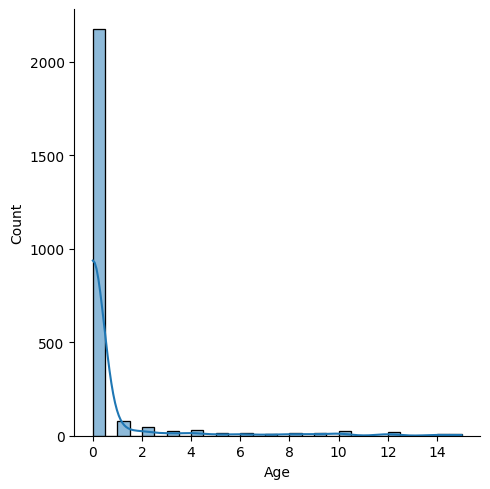

In [480]:
sns.displot( df_clear['Age'], kde=True , bins=30)
plt.show()

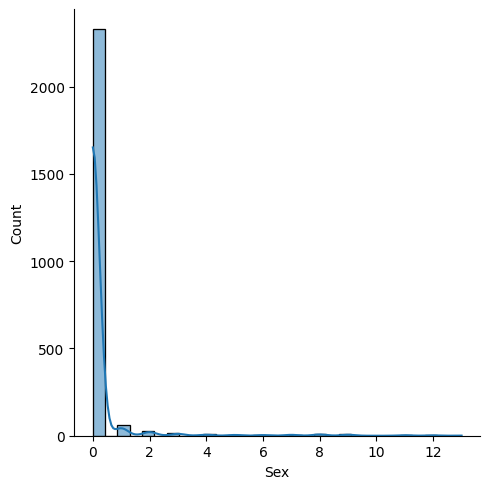

In [481]:
sns.displot( df_clear['Sex'], kde=True , bins=30)
plt.show()

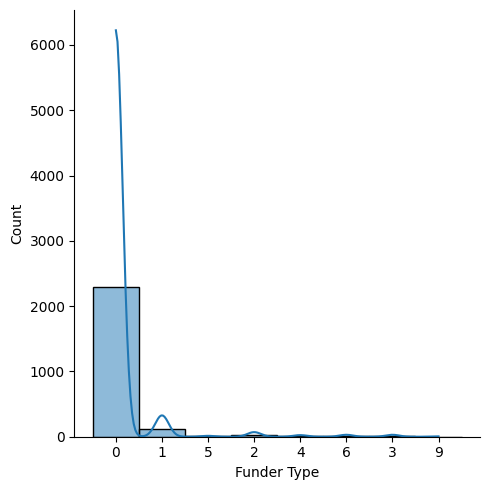

In [482]:
sns.displot( df_clear['Funder Type'], kde=True , bins=30)
plt.show()

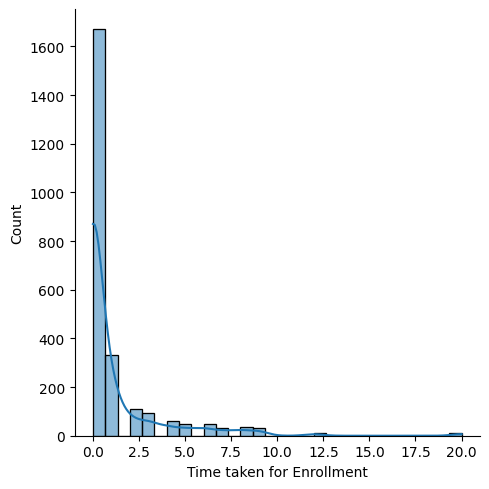

In [483]:
sns.displot( df_clear['Time taken for Enrollment'], kde=True , bins=30)
plt.show()

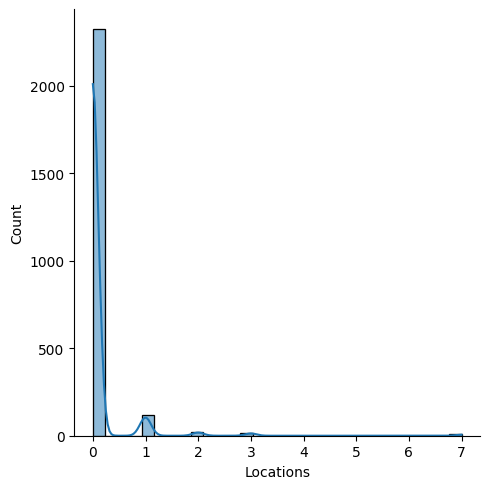

In [484]:
sns.displot( df_clear['Locations'], kde=True , bins=30)
plt.show()

#Apply Algorithem

#DecisionTree

In [485]:
from sklearn.tree import DecisionTreeClassifier

DFT= DecisionTreeClassifier()
DFT.fit(StandardScaler_x_train, y_train)

y_pred = DFT.predict(x_train)

accuracy_score(y_train, y_pred)

0.6542526421741318

In [487]:
#Cross validation
cross_val_score(DFT, StandardScaler_x_train , y_train , cv=5).mean()


0.626569877093275

#RandomForest

In [488]:

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(StandardScaler_x_train, y_train)

y_pred = RFC.predict(StandardScaler_x_test)

accuracy_score(y_test, y_pred)


0.6559356136820925

In [489]:
#Cross validation

cross_val_score(RFC, StandardScaler_x_train , y_train , cv=5).mean()

0.6341189575079428

#Logestric regraction

In [490]:
from sklearn.linear_model import LogisticRegression

LOR = LogisticRegression()
LOR.fit(StandardScaler_x_train, y_train)


y_pred = LOR.predict(StandardScaler_x_test)
accuracy_score(y_test, y_pred)


0.670020120724346

In [491]:
cross_val_score(LOR, StandardScaler_x_train , y_train , cv=5).mean()


0.6628090072528892